In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

np.random.seed(3093453)
sns.set(context="talk", style="darkgrid")

In [2]:
cwd = os.getcwd()
folder = "clean+translated-data"
file = "total.csv"
path = "/".join( (cwd, folder, file) )

df = pd.read_csv(path, index_col=0)

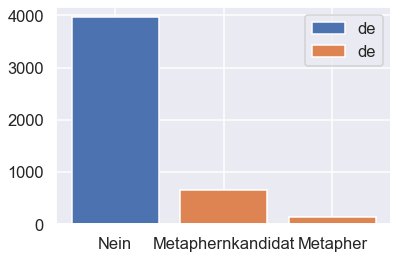

In [12]:
vc_de = df.loc[df.lang == "de", "Metapher?"].value_counts()
vc_da = df.loc[df.lang == "da", "Metapher?"].value_counts()
plt.bar(vc_de.index, vc_de, label = "de")
plt.bar(vc_da.index, vc_da, label = "de")

plt.legend()

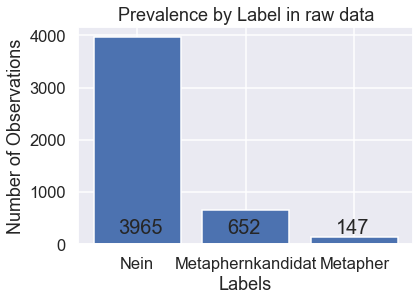

In [58]:
vc = df.loc[df.lang == "de", "Metapher?"].value_counts()

plt.bar(vc.index, vc)
for i, c in enumerate(vc):
    plt.annotate(str(c), (i-0.17, 200), fontsize = 20)

plt.xlabel("Labels")
plt.ylabel("Number of Observations")
plt.title("Prevalence by Label in raw data");


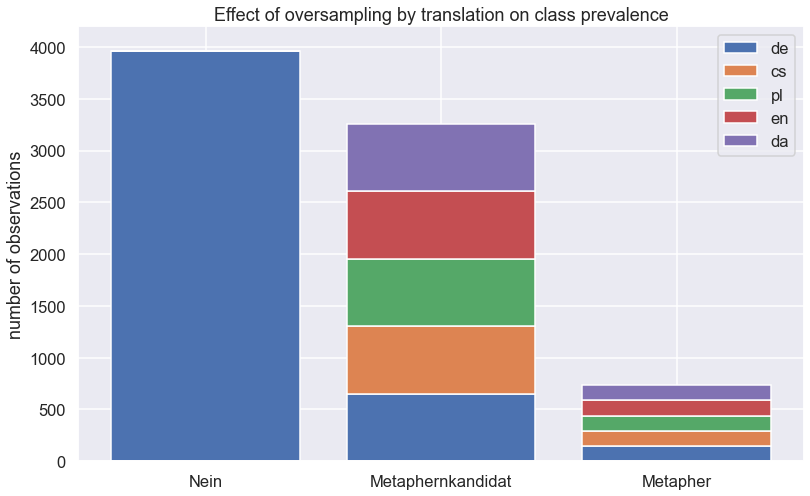

In [47]:
langs = df.lang.unique()
vc = df.loc[df.lang == "de", "Metapher?"].value_counts()

vc_df = pd.DataFrame(np.zeros((len(langs), 3)), index = langs, columns = vc.index)

plt.figure(figsize = (13, 8))
for i, lang in enumerate(langs):
    vc = df.loc[df.lang == lang, "Metapher?"].value_counts()
    
    vc_df.loc[lang, vc.index] = vc
    
    plt.bar(vc_df.columns, vc_df.loc[lang],
            bottom = vc_df.sum(axis=0)-vc_df.loc[lang],
            label = lang)
    
plt.legend();
plt.ylim([0, 4200]);
plt.ylabel("number of observations");
plt.title("Effect of oversampling by translation on class prevalence");

In [36]:
# german absolute
vc = df.loc[df.lang == "de", "Metapher?"].value_counts()
vc

Nein                 3965
Metaphernkandidat     652
Metapher              147
Name: Metapher?, dtype: int64

In [40]:
# german relative
(vc / vc.sum()).round(3)

Nein                 0.832
Metaphernkandidat    0.137
Metapher             0.031
Name: Metapher?, dtype: float64

In [42]:
# all absolute
vc = df["Metapher?"].value_counts()
vc

Nein                 3965
Metaphernkandidat    3260
Metapher              735
Name: Metapher?, dtype: int64

In [43]:
# all relative
(vc / vc.sum()).round(3)

Nein                 0.498
Metaphernkandidat    0.410
Metapher             0.092
Name: Metapher?, dtype: float64